In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import tensorflow as tf


# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"

In [3]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [4]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height,width,channels = image.shape


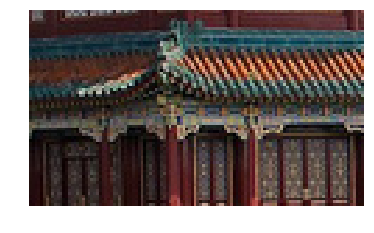

In [5]:
plot_image(image[:, :, :])
plt.show()

In [6]:
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

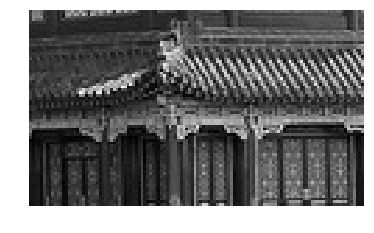

In [7]:
plot_image(images[0, :, :, 0])
plt.show()

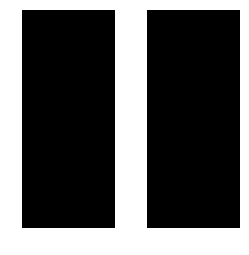

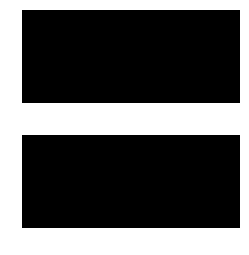

In [8]:
#create the filter
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()

## applying the filters

In [12]:
reset_graph()
X = tf.placeholder(tf.float32,shape=(None,height,width,1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X,feature_maps,strides=[1,1,1,1],padding="SAME",use_cudnn_on_gpu=False)


In [13]:
with tf.Session() as sess:
    output = convolution.eval({X:images})

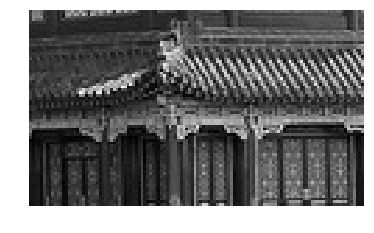

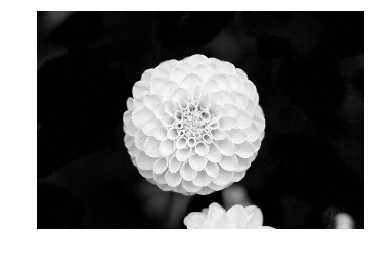

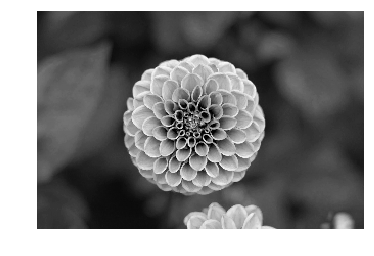

In [121]:
plot_image(images[0, :, :, 0])
plt.show()
plot_image(output[1, :, :, 0])
plt.show()
plot_image(output[1, :, :, 1])
plt.show()

In [67]:
import numpy as np
from sklearn.datasets import load_sample_images

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")

dataset = np.array([china, flower], dtype=np.float32)
batch_size,height,width, channels = dataset.shape

#create filters
filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

X = tf.placeholder(tf.float32,shape=(None,height,width,channels))
convolution = tf.nn.conv2d(X,filters,strides=[1,2,2,1],padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution,{X:dataset})


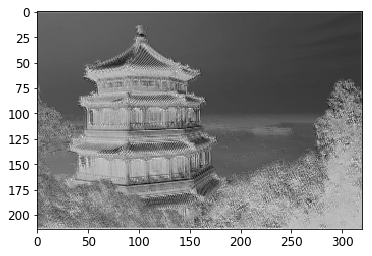

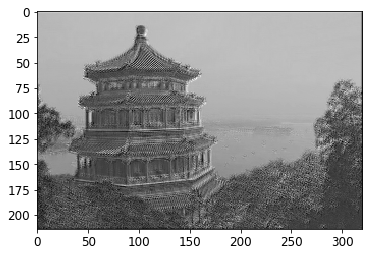

In [87]:
plt.imshow(output[0, :, :, 0], cmap="gray")
plt.show()
plt.imshow(output[0, :, :, 1], cmap="gray")
plt.show()

In [81]:
reset_graph()

X = tf.placeholder(shape=(None,height,width,channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2], padding="SAME")

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv,{X:dataset})

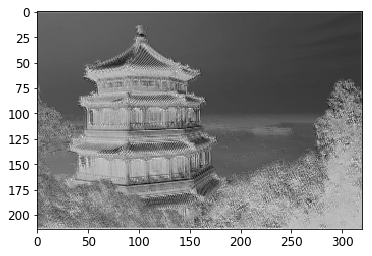

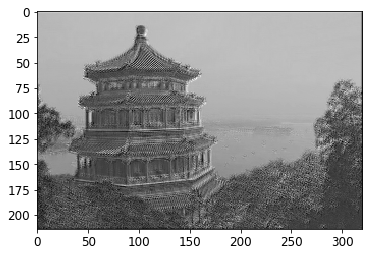

In [93]:
plt.imshow(output[0, :, :, 0], cmap="gray")
plt.show()
plt.imshow(output[0, :, :, 1], cmap="gray")
plt.show()

In [100]:
reset_graph()

filter_primes = np.array([2., 3., 5., 7., 11., 13.], dtype=np.float32)
x = tf.constant(np.arange(1, 13+1, dtype=np.float32).reshape([1, 1, 13, 1]))
filters = tf.constant(filter_primes.reshape(1, 6, 1, 1))

valid_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='VALID')
same_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='SAME')

with tf.Session() as sess:
    print("VALID:\n", valid_conv.eval())
    print("SAME:\n", same_conv.eval())

VALID:
 [[[[ 184.]
   [ 389.]]]]
SAME:
 [[[[ 143.]
   [ 348.]
   [ 204.]]]]


## Pooling layers

In [113]:
batch_size,height,width,channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2),dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

X = tf.placeholder(tf.float32,shape=(None,height,width,channels),)
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding = "VALID")

with tf.Session() as sess:
    output = sess.run(max_pool,{X:dataset})
    
output.shape

(2, 213, 320, 3)

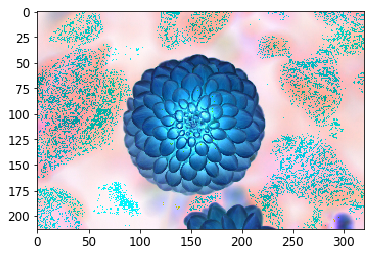

In [144]:
plt.imshow(output[1])


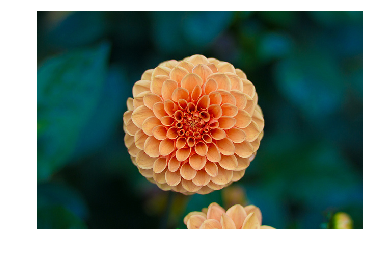

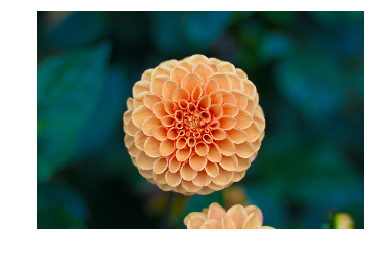

In [154]:
plot_color_image(dataset[1])
plt.show()
    
plot_color_image(output[1])
plt.show()

## MNIST

In [193]:
height = 28
width = 28
channels = 1 
n_inputs = height*width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32,shape=(None,n_inputs), name = "X")
    X_reshaped = tf.reshape(X,shape=(-1, height, width, channels))
    y = tf.placeholder(tf.int32, shape=(None),name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(X_reshaped, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")
with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID")
    pool3_flat = tf.reshape(pool3,shape=[-1,pool3_fmaps*7*7])

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat,n_fc1,activation=tf.nn.relu,name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1,n_outputs,name="outputs")
    Y_proba = tf.nn.softmax(logits,name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()



In [194]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [198]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_mnist_model")
        

0 Train accuracy: 0.97 Test accuracy: 0.9613
1 Train accuracy: 0.98 Test accuracy: 0.9727
2 Train accuracy: 0.95 Test accuracy: 0.9746
3 Train accuracy: 0.97 Test accuracy: 0.9812
4 Train accuracy: 0.99 Test accuracy: 0.9792
5 Train accuracy: 1.0 Test accuracy: 0.981
6 Train accuracy: 0.99 Test accuracy: 0.9829
7 Train accuracy: 1.0 Test accuracy: 0.9848
8 Train accuracy: 1.0 Test accuracy: 0.9834
9 Train accuracy: 1.0 Test accuracy: 0.985


## Trying to improve the Test accuracy

In [229]:
import tensorflow as tf
height = 28
width = 28
channels = 1
n_inputs = height*width

#layer1
conv1_fmaps = 32
conv1_ksize = 3 
conv1_stride = 1 
conv1_pad = "SAME"

#layer2
conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 1
conv2_pad = "SAME"
conv2_dropout_rate = .25
relu = tf.nn.relu
#fc
pool3_fmaps = conv2_fmaps

n_fc1 = 128
fc1_dropout_rate = 0.5
#final output
n_outputs = 10

In [270]:
reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32,shape=(None,n_inputs),name="X")
    X_reshape = tf.reshape(X,shape=[-1,height,width,channels])
    y = tf.placeholder(tf.int64,shape=(None),name="y")
    training = tf.placeholder_with_default(False,shape=(),name="training")
    
conv1 = tf.layers.conv2d(X_reshape,filters=32,kernel_size=3,strides=1,padding="SAME",activation=relu, name="conv1")

conv2 = tf.layers.conv2d(conv1,filters=64,kernel_size=3,strides = 1,padding="SAME",activation=relu,name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID")
    pool3_flat = tf.reshape(pool3,shape=[-1,64*14*14])
    pool3_flat_drop = tf.layers.dropout(pool3_flat,.25,training=training)

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat_drop,128,activation=relu,name="fc1")
    fc1_drop = tf.layers.dropout(fc1,.5,training=training)
    
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1,n_outputs,name="output")
    Y_proba = tf.nn.softmax(logits,name="Y_proba")

In [271]:
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
    
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [272]:
from tensorflow.examples.tutorials.mnist import input_data

In [273]:
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [274]:
def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, value in zip(gvars, tf.get_default_session().run(gvars))}

def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name: tf.get_default_graph().get_operation_by_name(gvar_name + "/Assign")
                  for gvar_name in gvar_names}
    init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops, feed_dict=feed_dict)

In [276]:
n_epochs = 1000
batch_size = 50
best_loss_val = np.infty
check_interval = 500
checks_since_last_progress = 0
max_checks_without_progress = 20
best_model_params = None

In [278]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples//batch_size):
            X_batch,y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op,{X:X_batch,y:y_batch,training:True})
            if iteration % check_interval == 0:
                loss_val = loss.eval(feed_dict={X: mnist.validation.images,y: mnist.validation.labels})
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval({X: mnist.validation.images,y: mnist.validation.labels})
        print("Epoch {}, train accuracy: {:.4f}%, valid. accuracy: {:.4f}%, valid. best loss: {:.6f}".format(
                epoch, acc_train * 100, acc_val * 100, best_loss_val))
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break
    if best_model_params:
        restore_model_params(best_model_params)
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                        y: mnist.test.labels})
    print("Final accuracy on test set:", acc_test)
    save_path = saver.save(sess, "./my_mnist_model")

Epoch 0, train accuracy: 96.0000%, valid. accuracy: 98.4400%, valid. best loss: 0.058580
Epoch 1, train accuracy: 98.0000%, valid. accuracy: 98.9200%, valid. best loss: 0.044941
Epoch 2, train accuracy: 100.0000%, valid. accuracy: 98.3600%, valid. best loss: 0.036455
Epoch 3, train accuracy: 100.0000%, valid. accuracy: 98.9000%, valid. best loss: 0.036455
Epoch 4, train accuracy: 100.0000%, valid. accuracy: 98.9400%, valid. best loss: 0.036455
Epoch 5, train accuracy: 100.0000%, valid. accuracy: 98.9400%, valid. best loss: 0.036455
Epoch 6, train accuracy: 98.0000%, valid. accuracy: 99.1400%, valid. best loss: 0.036455
Epoch 7, train accuracy: 100.0000%, valid. accuracy: 99.0000%, valid. best loss: 0.036455
Epoch 8, train accuracy: 100.0000%, valid. accuracy: 99.0000%, valid. best loss: 0.036455
Epoch 9, train accuracy: 100.0000%, valid. accuracy: 99.0200%, valid. best loss: 0.036455
Early stopping!
Final accuracy on test set: 0.9876
